In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/rock_density_xray.csv')

In [ ]:
df.columns= ["Signal","Density"]

In [ ]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<Axes: xlabel='Signal', ylabel='Density'>

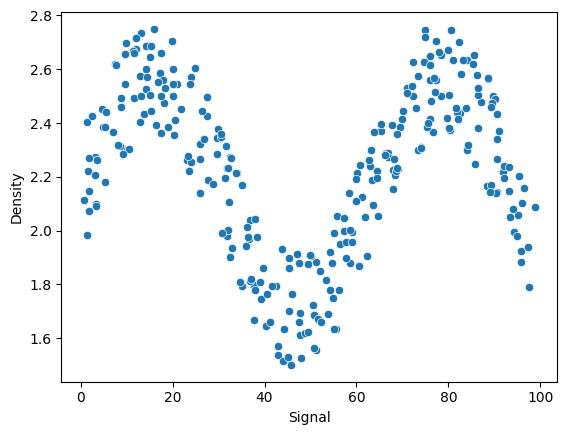

In [ ]:
sns.scatterplot(x=df.Signal, y=df.Density)

In [ ]:
X= df["Signal"].values.reshape(-1,1)
y= df['Density']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model= LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_preds= linear_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
mean_absolute_error(y_test, linear_preds)

0.211198973318633

In [ ]:
np.sqrt(mean_squared_error(y_test, linear_preds))

0.2570051996584629

MAE and MSE numbers are quite good but the problem will appear when we start to plot the linear regression model


In [ ]:
signal_range= np.arange(0,100)

In [ ]:
signal_preds= linear_model.predict(signal_range.reshape(-1,1))

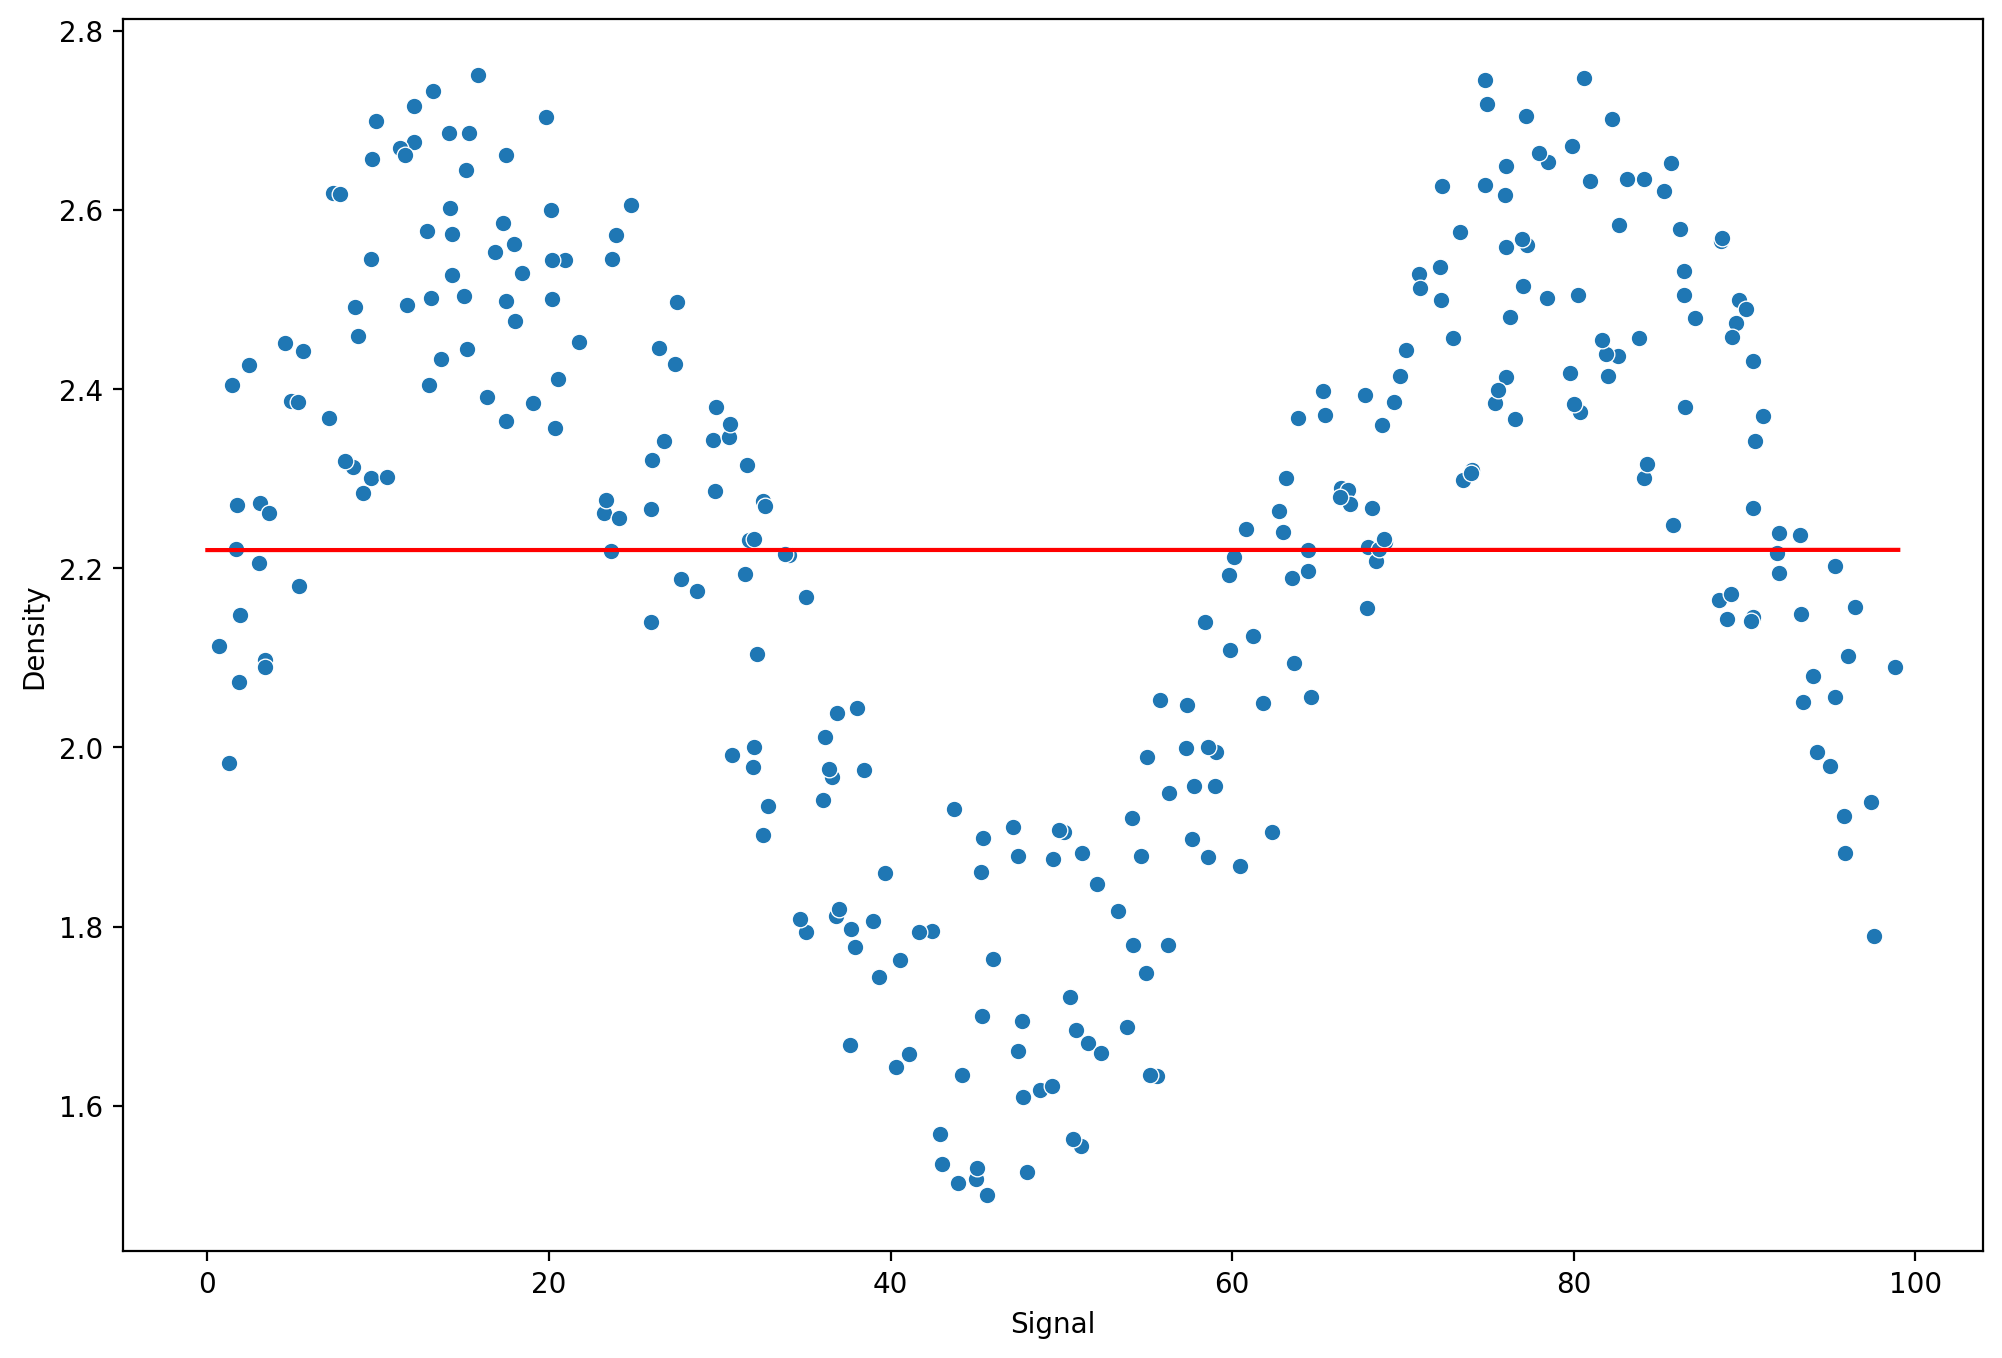

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x=df.Signal, y=df.Density)
plt.plot(signal_range, signal_preds, color='red')

## Function to Help Run Models


In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))


    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='red')
    plt.plot(signal_range,output)

In [ ]:
model= LinearRegression()

RMSE : 0.2570051996584629


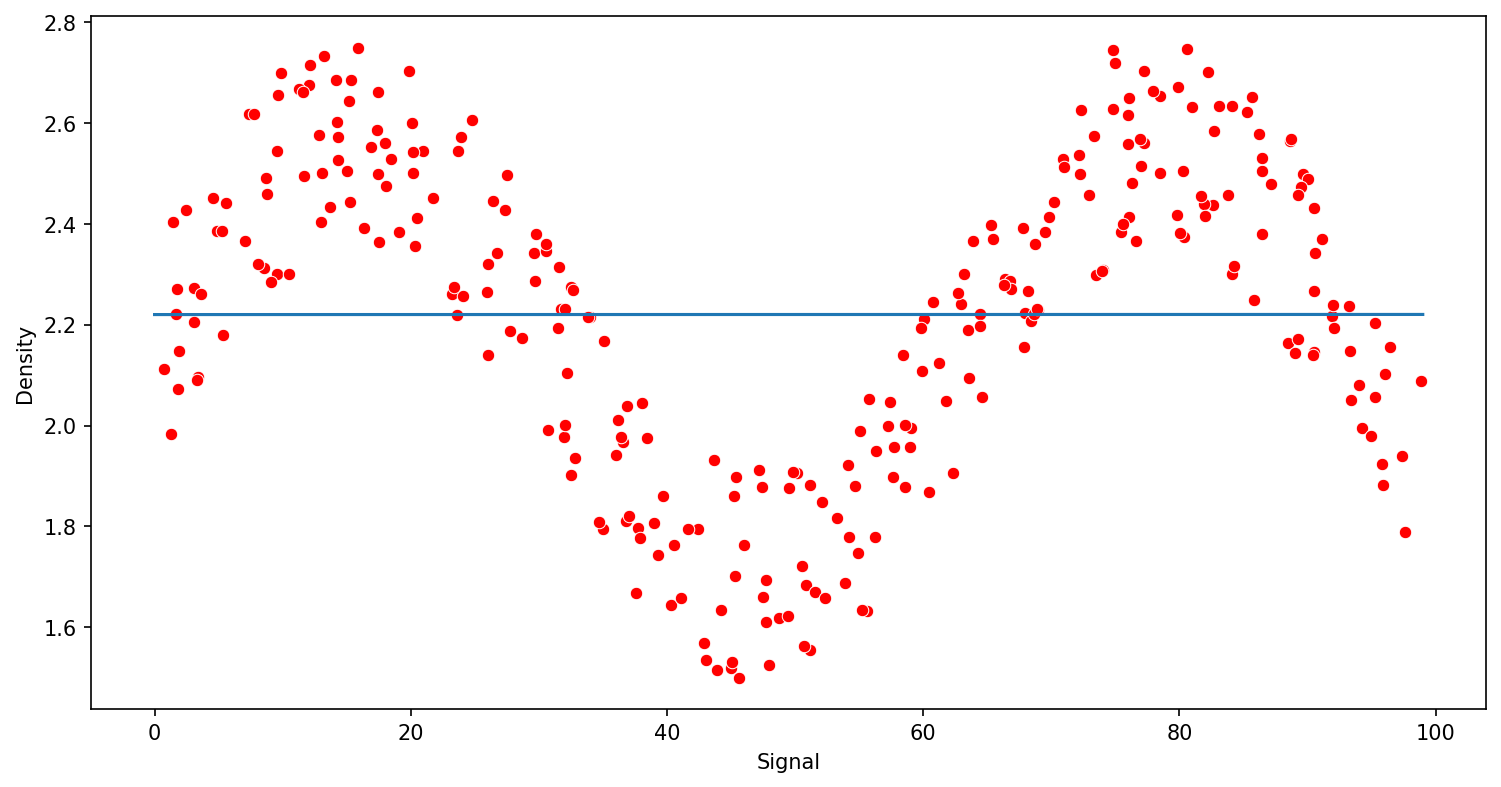

In [ ]:
run_model(model,X_train,y_train,X_test,y_test)

Making pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe= make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE : 0.13807449061369673


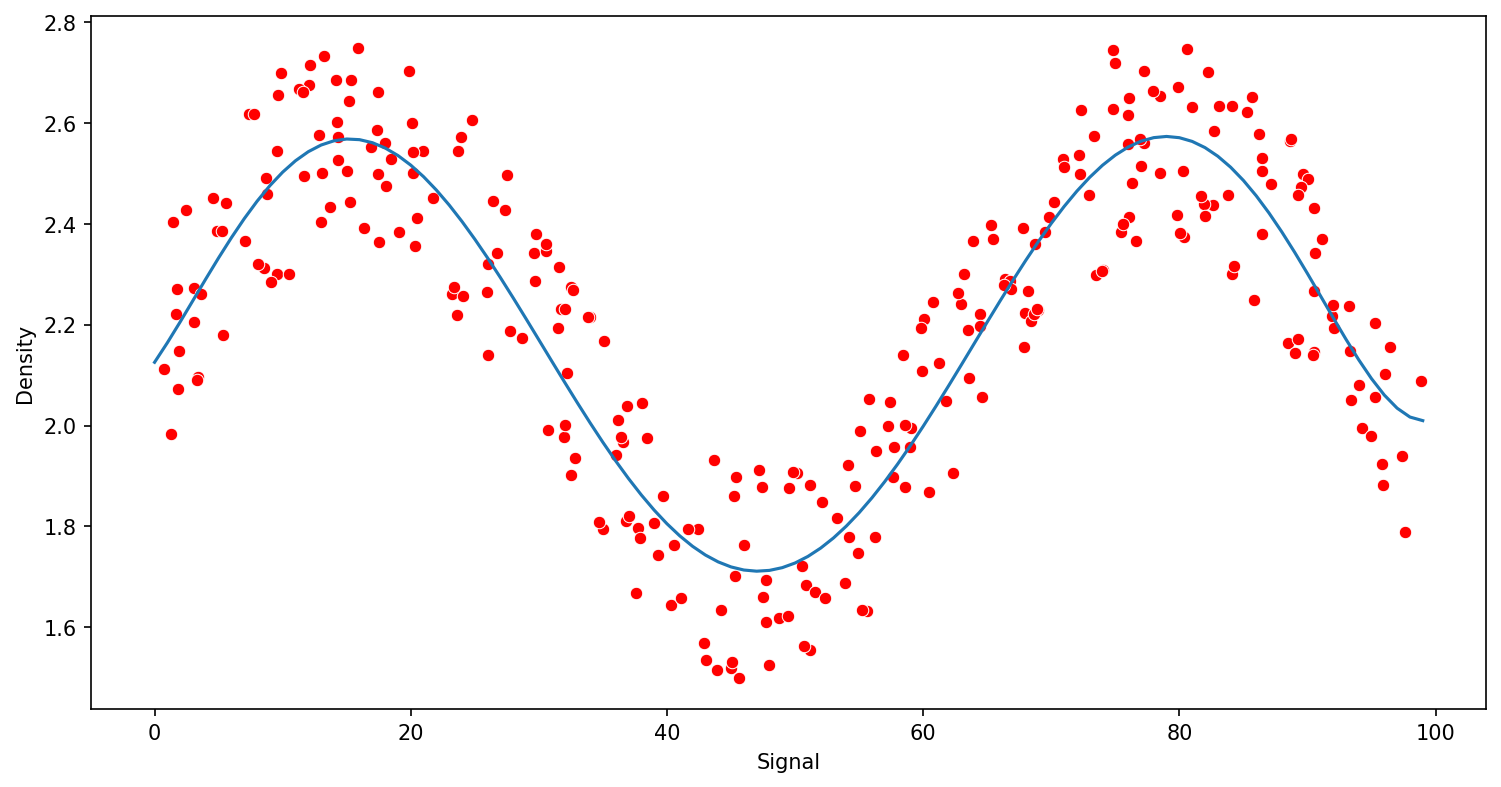

In [ ]:
run_model(pipe,X_train,y_train,X_test,y_test)

# Trying K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k_values=[1,5,10]

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


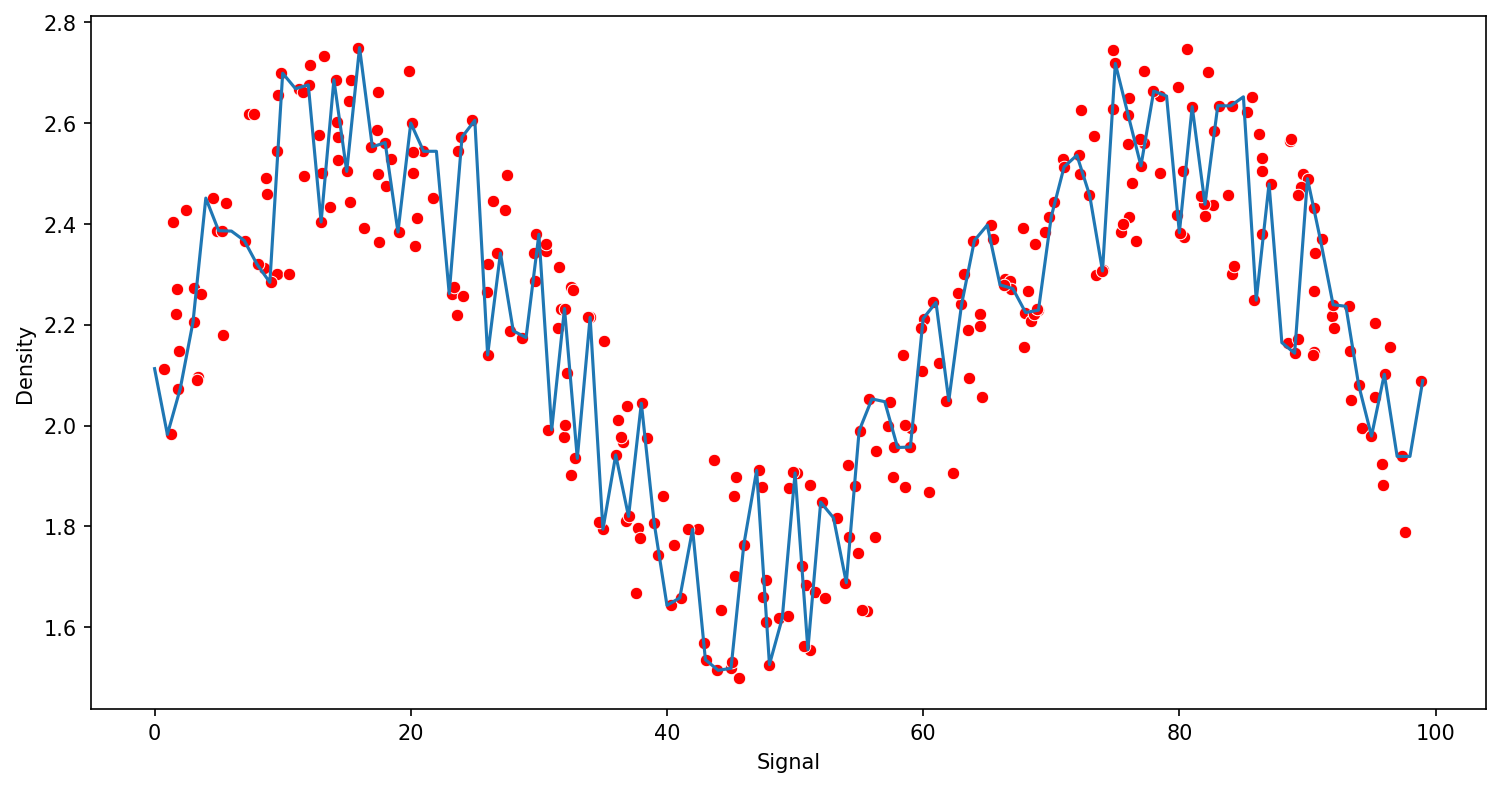

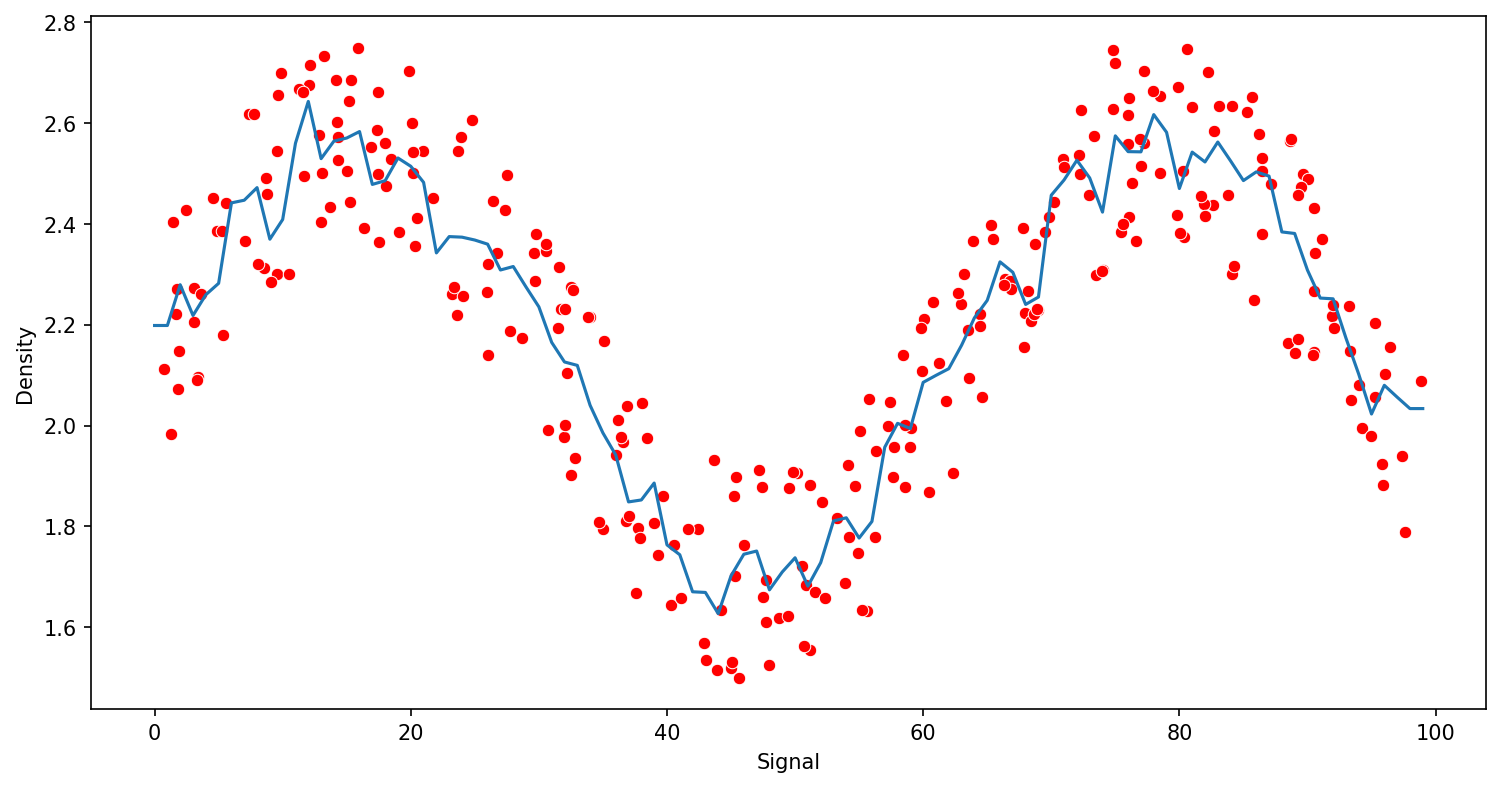

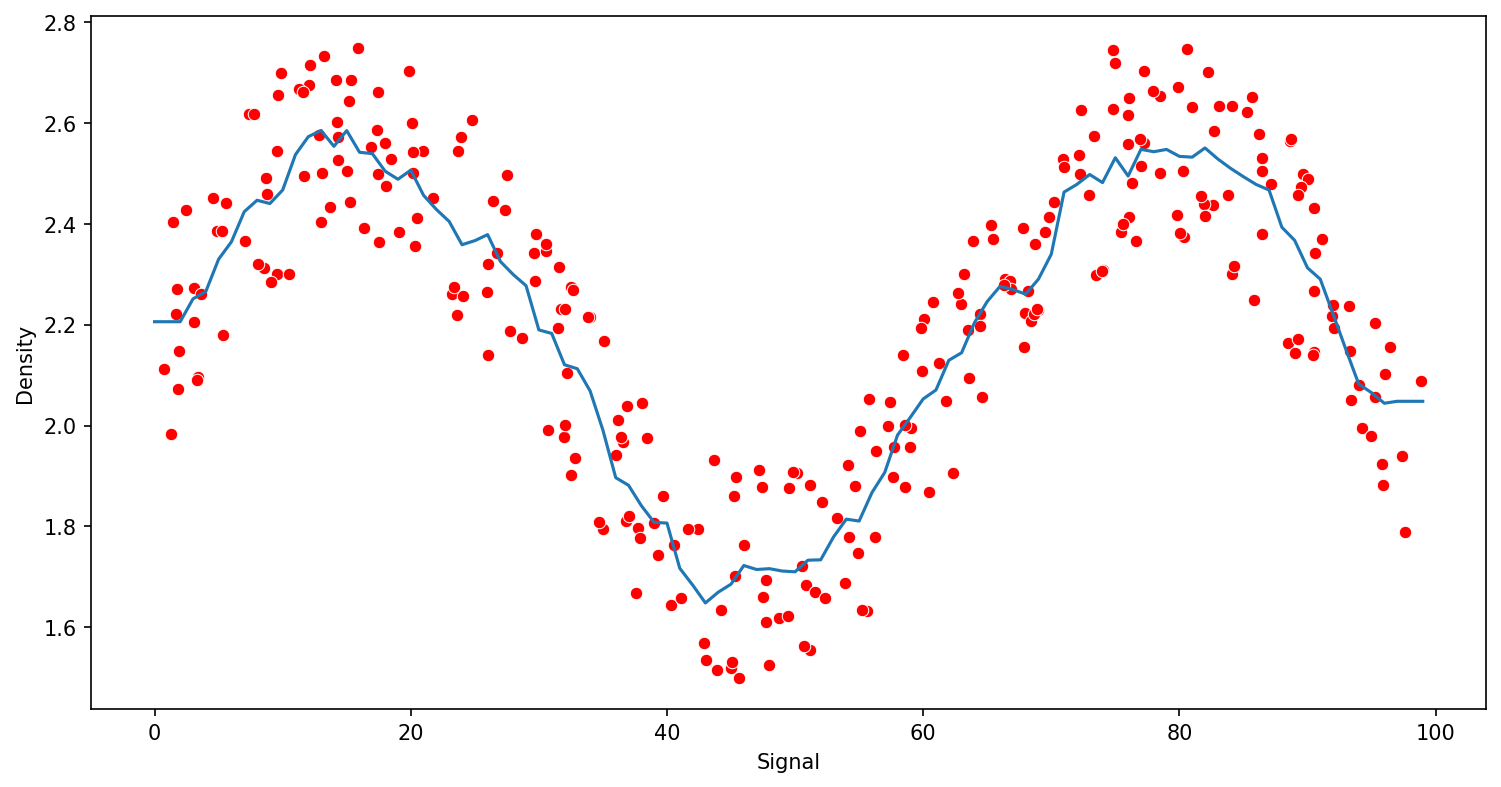

In [ ]:
for k in k_values:
  knn= KNeighborsRegressor(n_neighbors=k)
  run_model(knn,X_train,y_train,X_test,y_test)

Trying Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


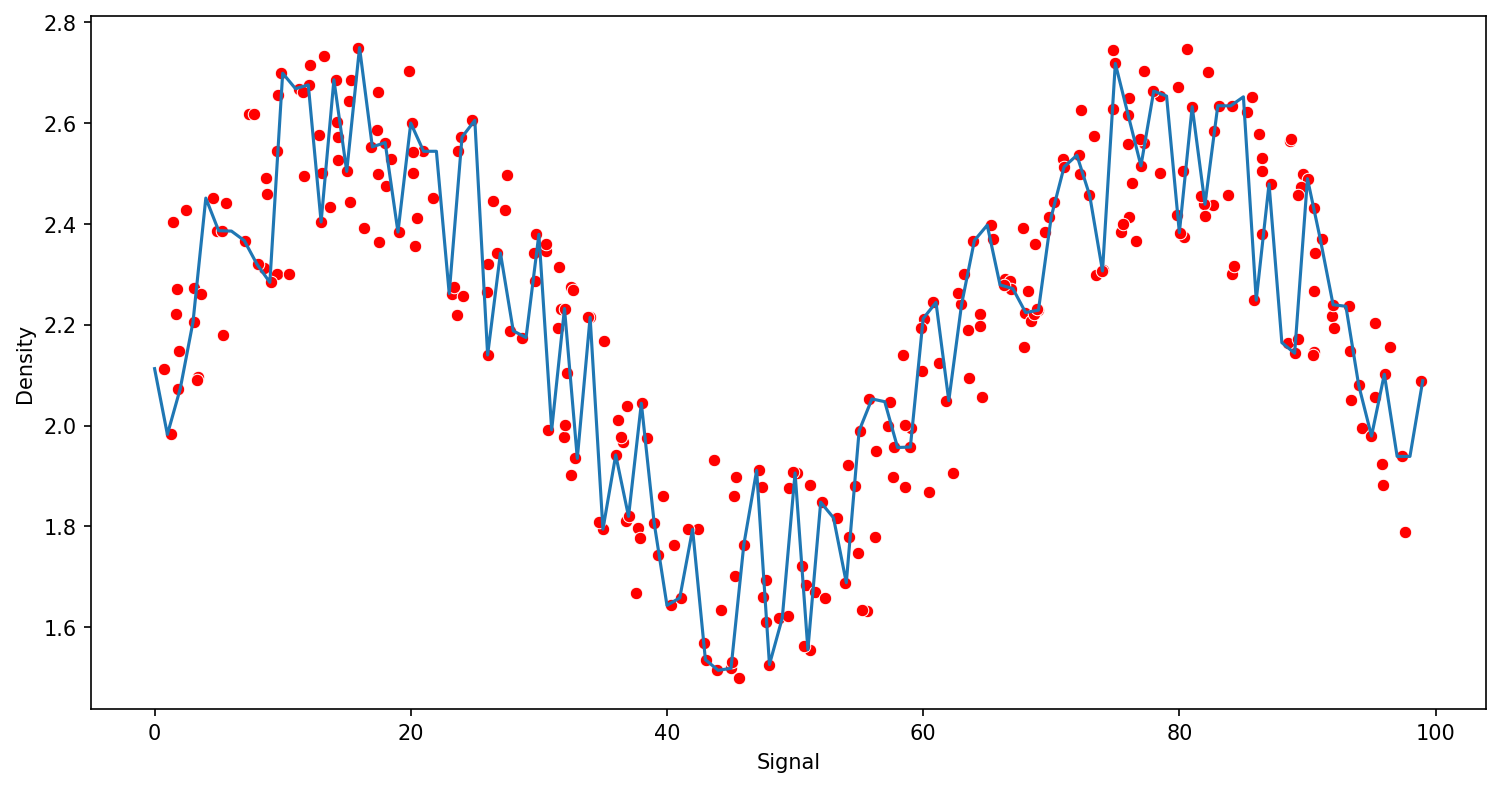

In [ ]:
model= DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

and Trying SVM


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr=SVR()

In [ ]:
param_grid= {'C':[0.1,1,10,100],'gamma':['auto','scale']}
grid= GridSearchCV(svr,param_grid,verbose=3)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, gamma=auto;, score=0.652 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=auto;, score=0.603 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=auto;, score=0.618 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=auto;, score=0.618 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=auto;, score=0.602 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.789 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.735 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.809 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.790 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.788 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=auto;, score=0.746 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=auto;,

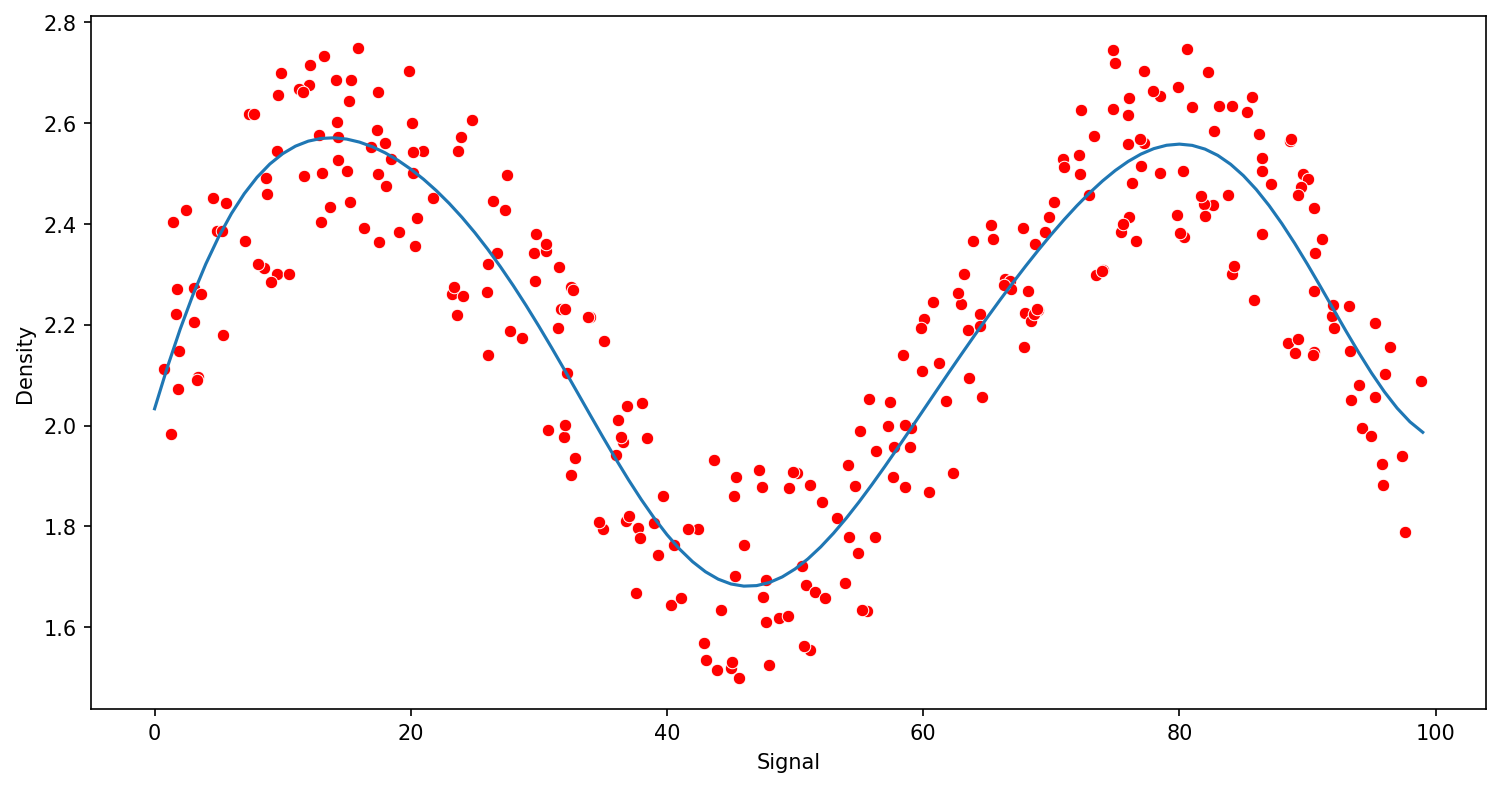

In [ ]:
run_model(grid,X_train,y_train,X_test,y_test)

and finally trying random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr= RandomForestRegressor(n_estimators=10)

RMSE : 0.13786876128687064


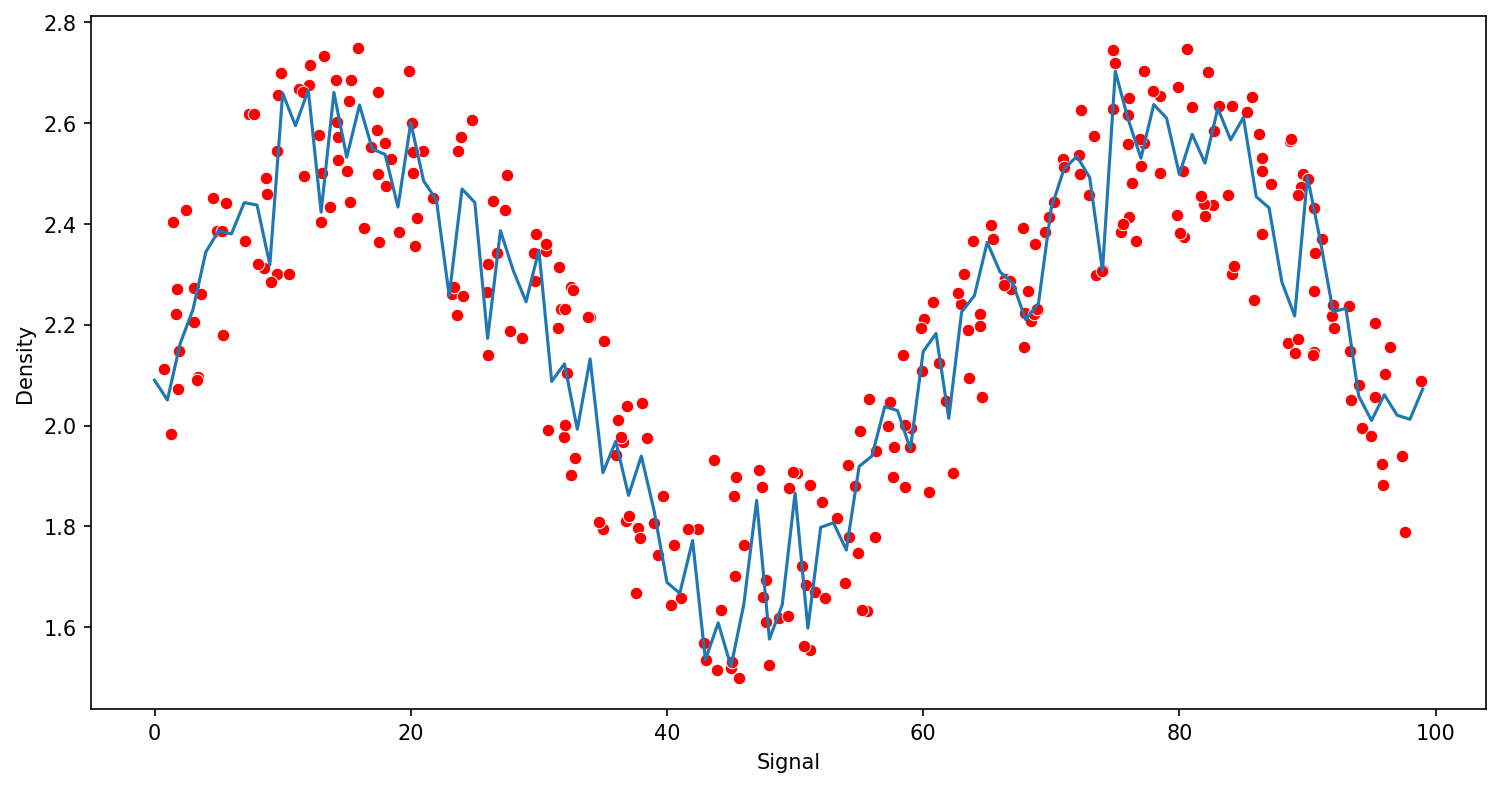

In [ ]:
run_model(rfr,X_train,y_train,X_test,y_test)

After comparing all the results, it became clear that SVM delivered the best performance.